In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
seed =2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
model = Sequential([
    Conv2D(128, kernel_size=(2, 2), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 128)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                294944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics =[keras.metrics.categorical_accuracy] )

In [10]:
MODEL_DIR = '../model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [11]:
modelpath = MODEL_DIR + 'mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
chekpointer = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10)

In [12]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=200, callbacks=[chekpointer, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.5772 - categorical_accuracy: 0.8108
Epoch 00001: val_loss improved from inf to 0.10408, saving model to ../model/mnist-cnn-01-0.1041.hdf5
48000/48000 [==============================] - 174s 4ms/sample - loss: 0.5760 - categorical_accuracy: 0.8112 - val_loss: 0.1041 - val_categorical_accuracy: 0.9719
Epoch 2/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.2705 - categorical_accuracy: 0.9154
Epoch 00002: val_loss improved from 0.10408 to 0.08041, saving model to ../model/mnist-cnn-02-0.0804.hdf5
48000/48000 [==============================] - 170s 4ms/sample - loss: 0.2703 - categorical_accuracy: 0.9154 - val_loss: 0.0804 - val_categorical_accuracy: 0.9771
Epoch 3/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.2115 - categorical_accuracy: 0.9310
Epoch 00003: val_loss improved from 0.08041 to 0.06508, saving model to ../model

In [17]:
del model
model = load_model('../model/mnist-cnn-09-0.0454.hdf5')

In [18]:
model.evaluate(x_test, y_test, verbose=4)[1]

0.9872

In [19]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

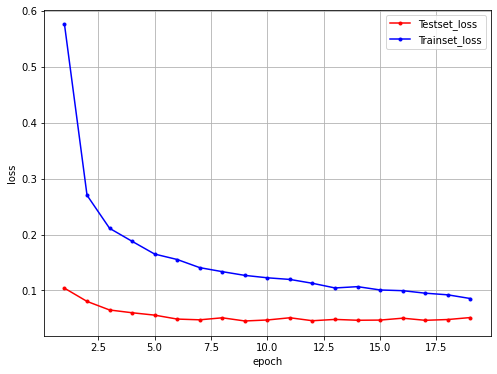

In [20]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()